In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision=2)  # to avoid too long of a number

In [61]:
# the objective of this project---------
# utilize the descent gradient to realize the multivariable linear regression

In [87]:
# import data------
data = np.loadtxt("C:/Users/LENOVO/Desktop/实验二/data2.txt", delimiter=",")

X_1= data[:, 0]  # extract the first columns as X_1
X_2 = data[:, 1]  # extract the second columns as X_2
y = data[:, 2]  # extract the third columns as y
X_raw = np.column_stack((X_1, X_2))  

#normalized
mean = np.mean(X_raw, axis=0)  
std = np.std(X_raw, axis=0)   
X_norm = (X_raw - mean) / std
X_raw = X_norm

m = X_raw.shape[1]    #the number of features
num = len(X_raw)      #the number of samples
theta = np.zeros(m)   #initialize the theta(s)

print(theta.shape)
print(X_raw.shape)

[[2.10e+03 3.00e+00]
 [1.60e+03 3.00e+00]
 [2.40e+03 3.00e+00]
 [1.42e+03 2.00e+00]
 [3.00e+03 4.00e+00]
 [1.98e+03 4.00e+00]
 [1.53e+03 3.00e+00]
 [1.43e+03 3.00e+00]
 [1.38e+03 3.00e+00]
 [1.49e+03 3.00e+00]
 [1.94e+03 4.00e+00]
 [2.00e+03 3.00e+00]
 [1.89e+03 3.00e+00]
 [4.48e+03 5.00e+00]
 [1.27e+03 3.00e+00]
 [2.30e+03 4.00e+00]
 [1.32e+03 2.00e+00]
 [1.24e+03 3.00e+00]
 [2.61e+03 4.00e+00]
 [3.03e+03 4.00e+00]
 [1.77e+03 3.00e+00]
 [1.89e+03 2.00e+00]
 [1.60e+03 3.00e+00]
 [1.96e+03 4.00e+00]
 [3.89e+03 3.00e+00]
 [1.10e+03 3.00e+00]
 [1.46e+03 3.00e+00]
 [2.53e+03 3.00e+00]
 [2.20e+03 3.00e+00]
 [2.64e+03 3.00e+00]
 [1.84e+03 2.00e+00]
 [1.00e+03 1.00e+00]
 [2.04e+03 4.00e+00]
 [3.14e+03 3.00e+00]
 [1.81e+03 4.00e+00]
 [1.44e+03 3.00e+00]
 [1.24e+03 3.00e+00]
 [2.13e+03 4.00e+00]
 [4.22e+03 4.00e+00]
 [2.16e+03 4.00e+00]
 [1.66e+03 2.00e+00]
 [2.24e+03 3.00e+00]
 [2.57e+03 4.00e+00]
 [1.20e+03 3.00e+00]
 [8.52e+02 2.00e+00]
 [1.85e+03 4.00e+00]
 [1.20e+03 3.00e+00]]
(2,)
(47, 2)

In [77]:
# select the model------
def model(x, theta, b):
    y_pred = np.dot(x, theta) + b
    return y_pred

In [78]:
# caculate the loss function------

def computer_loss(x, theta, b, y):
    loss = 0
    for i in range(num):
        y_i = np.dot(x[i], theta) + b
        loss += (1/2) * (y_i - y[i]) ** 2
    return loss

In [83]:
# calculate the gradient and adjust it------
  
    # the way of calculate multivariable gradient is calculate each variale and adjust them seperately
    # calculate theta[0]

def gradient(x, theta, b, y):
    #calculate each theta

    dg_w = np.zeros(m)   # initialize the value of theta(s) and b
    dg_b = 0

    for i in range(num):
        err = ((np.dot(x[i], theta) + b) - y[i]) 
        for j in range(m):
            dg_w[j] = dg_w[j] + err * x[i][j]
        dg_b = dg_b + err



    return dg_w, dg_b

In [84]:
def descent_gradient(x, theta, b, y, alpha, iterations):

    # Please mention that you must go on descent_gradient at the same time for all theta(s),  
    #or the result is wrong

    L = []   #initialize an array to store loss value
    
    theta = [1,1]
    b = 1
    
    for i in range(iterations):
        dg_w, dg_b = gradient(x, theta, b, y)
        
        theta = theta - alpha * dg_w    #向量化操作更新所有theta???
        b = b - alpha * dg_b

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            L.append(computer_loss(x, theta, b, y))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {L[-1]:8.2f}   ")
    return theta, b, L
            


In [85]:
# predict with the trained model------

def trained_model(x, theta, b):
    y_pre = np.dot(x, theta) + b
    return y_pre

In [86]:
# give an example 
alpha = 0.001
iterations = 1000
theta = [1,1]
b = 1
theta_trained, b_trained, L_process = descent_gradient(X_raw, theta, b, y, alpha, iterations)

t = [1800 ,3]
prediction  = trained_model(t, theta_trained, b_trained)

print(f"The prediction of the new data is:{prediction}")
print(f"the best theta and b is:{theta_trained[0]}  {theta_trained[1]}  {b_trained}")


Iteration    0: Cost 2802567466149.73   
Iteration  100: Cost 97218649371.63   
Iteration  200: Cost 96049806693.50   
Iteration  300: Cost 96034401626.19   
Iteration  400: Cost 96034166039.63   
Iteration  500: Cost 96034162434.36   
Iteration  600: Cost 96034162379.19   
Iteration  700: Cost 96034162378.35   
Iteration  800: Cost 96034162378.33   
Iteration  900: Cost 96034162378.33   
The prediction of the new data is:197326711.15286595
the best theta and b is:109447.79642094881  -6578.354805468293  340412.6595744675


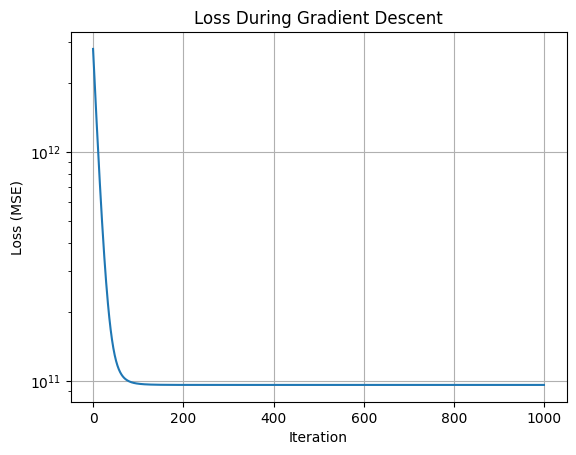

In [56]:
# plot the relationship between loss and iterations
plt.plot(range(0, iterations), L_process)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.yscale('log') 
plt.title('Loss During Gradient Descent')
plt.grid(True)
plt.show()
